## K_Means Clustering Notes

Unsupervised learning algorithm (find patterns in the data) that will attempt to group similar clusters together. The overall goal is to divide data into distinct groups such that teh observatinos within each group are similar.

KMC is very valuable as both an analysis tool when the groupings of rows of data are unclear, or as a feature-engineering step for improving supervised learning models. 

**Examples:**

* Cluster similar documents
* Cluster customers based on features
* Market segmentation
* Identify similar physical groups

**Algorithm:**

* Choose a number of clusters "K"
* Randomly assign each point to a cluster
* Until the clusters stop changing:
    * For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    * Assign each data point to the cluster for which the centroid is the closest
    

**Additional Resources:**
* https://www.datacamp.com/tutorial/k-means-clustering-python

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Methods

In [2]:
def print_null_values(df):
    count = df.isna().sum().sum()
    percent = round(df.isna().sum().sum() / df.size * 100, 1)
    
    print("--Null Values--")
    print(f'Total Null Values: {count} / {df.size}')
    print(f'Percent Null Values: %{percent}')
    print("")
    print("--Null Values per Feature--")
    print(df.isna().sum())
    
def print_correlation_matrix(df, target):
    print(df.corrwith(df[target]).sort_values(ascending=False))
    plt.figsize(20,12)
    return sns.heatmap(df.corr(), annot=True)

def measure_model_accuracy(y_test, predictions):
    from sklearn.metrics import classification_report, confusion_matrix

    print("Confusion Matrix:")
    print('\n')
    print(confusion_matrix(y_test, predictions))
    print('\n')
    print("Classification Report:")
    print('\n')
    print(classification_report(y_test, predictions))

## 1. Frame the Problem

This is fake data, not a real dataset.

## 2. Get the Data

In [8]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

## 3. EDA

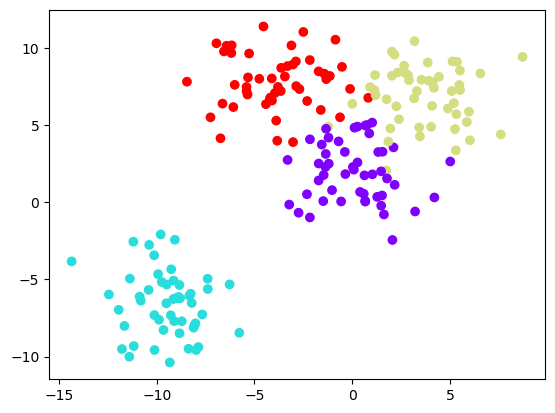

In [11]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

## 4. Prepare the Data

In [21]:
X = data[0]
y = data[1]

## 5. Select & Train the Models

In [22]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, n_init='auto')

kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto')

In [23]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [24]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3,
       0, 1], dtype=int32)

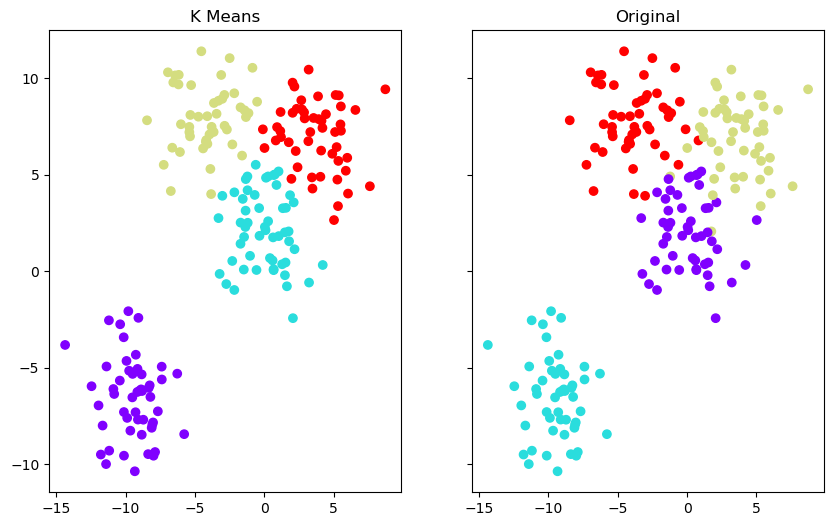

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap="rainbow")

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=y, cmap="rainbow")